## Project1 Writing a Data Scientist Blog Post

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline


## 1. Business Understanding
The following questions will be answer after analyzing the dataset:
1. The highest salary belong to which Country ??
2. The highest salary belong to which size of company and its type??
3. Which Formal Education has the highest salary?
4. What the programing language that the people most like it ?

## 2. Understand Data

In [2]:
#importing data

data=pd.read_csv('survey_results_public.csv')

#Viewing head 5 rows for data
data.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#start Handling missing data with inspecting the sum of it in each col
data.isna().sum()

Respondent                  0
Professional                0
ProgramHobby                0
Country                     0
University                  0
                        ...  
QuestionsInteresting    16856
QuestionsConfusing      16973
InterestedAnswers       16780
Salary                  38501
ExpectedSalary          48826
Length: 154, dtype: int64

In [5]:
#columns in dataset are
print(data.columns)

#To view all col`s we need loop
for c in data:
    print(c)

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)
Respondent
Professional
ProgramHobby
Country
University
EmploymentStatus
FormalEducation
MajorUndergrad
HomeRemote
CompanySize
CompanyType
YearsProgram
YearsCodedJob
YearsCodedJobPast
DeveloperType
WebDeveloperType
MobileDeveloperType
NonDeveloperType
CareerSatisfaction
JobSatisfaction
ExCoderReturn
ExCoderNotForMe
ExCoderBalance
ExCoder10Years
ExCoderBelonged
ExCoderSkills
ExCoderWillNotCode
ExCoderActive
PronounceGIF
ProblemSolving
BuildingThings
LearningNewTech
BoringDetails
JobSecurity
DiversityImportant
AnnoyingUI
FriendsDevelopers
RightWrongWay
UnderstandComputer

In [6]:
#Number of row and columns is 
data.shape

(51392, 154)

## 3.Prepare Data

In [4]:
#take care of missing data by filling it

data=data.fillna(method='ffill')
data=data.fillna(method='bfill')


## 4. Answer Questions


**Q1)The highest salary belong to which Country ??**

In [7]:
data['Country'].unique()

array(['United States', 'United Kingdom', 'Switzerland', 'New Zealand',
       'Poland', 'Colombia', 'France', 'Canada', 'Germany', 'Greece',
       'Brazil', 'Israel', 'Italy', 'Belgium', 'India', 'Chile',
       'Croatia', 'Argentina', 'Netherlands', 'Denmark', 'Ukraine',
       'Sri Lanka', 'Malaysia', 'Finland', 'Turkey', 'Spain', 'Austria',
       'Mexico', 'Russian Federation', 'Bulgaria', 'Uruguay', 'Estonia',
       'Iran', 'Bangladesh', 'Sweden', 'Lithuania', 'Paraguay', 'Romania',
       'Costa Rica', 'Serbia', 'Slovenia', 'United Arab Emirates',
       'Tunisia', 'Kenya', 'El Salvador', 'Norway', 'Dominican Republic',
       'Belarus', 'Portugal', 'Czech Republic', 'Albania',
       'I prefer not to say', 'South Africa', 'Uzbekistan', 'Moldavia',
       'Ireland', 'Nepal', 'Pakistan', 'Slovak Republic', 'Hungary',
       'Egypt', 'Australia', 'Japan', 'South Korea', 'Rwanda',
       'Luxembourg', 'Kazakhstan', 'Bolivia', 'Vietnam', 'Somalia',
       'Saudi Arabia', 'Ethiopia

In [8]:
data.Country.value_counts()


United States                     11455
India                              5197
United Kingdom                     4395
Germany                            4143
Canada                             2233
                                  ...  
Bahamas                               1
S. Georgia & S. Sandwich Isls.        1
Falkland Islands                      1
Macau                                 1
French Guyana                         1
Name: Country, Length: 201, dtype: int64

              Country         Salary
16            Bahamas  110000.000000
22             Belize  127653.057592
24            Bermuda  115000.000000
44   Christmas Island  110000.000000
54           Djibouti  155000.000000
175       Tadjikistan  105000.000000


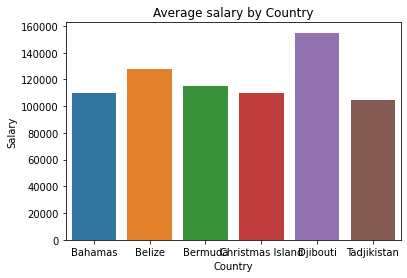

In [9]:
#average salary
highest=data.groupby(['Country'])['Salary'].mean().reset_index()
#handle missing data
highest=highest.dropna()
#filter data to get the salary above 100000
highest=highest[highest['Salary']>=100000]
print(highest)
#ploting the data
sns.barplot(x = 'Country', y = 'Salary', data = highest.dropna())
plt.title('Average Salary by The Country');


     Country    Salary
54  Djibouti  155000.0


<AxesSubplot:>

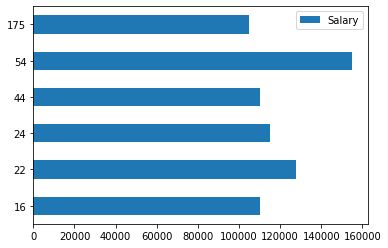

In [10]:
#filter data to pick highest salary
maximum=highest[highest['Salary']==highest['Salary'].max()]
print(maximum)
highest.plot(kind='barh')
# print("The highest salary belong to which Country is ",maximum['Country'])


**Q2)The highest salary belong to which size of company and its type??** 

In [11]:
data.groupby(['CompanyType','CompanySize'])['Salary'].max()


CompanyType                                    CompanySize             
Government agency or public school/university  1,000 to 4,999 employees    193000.000000
                                               10 to 19 employees          180000.000000
                                               10,000 or more employees    190000.000000
                                               100 to 499 employees        181818.181818
                                               20 to 99 employees          175000.000000
                                                                               ...      
Venture-funded startup                         5,000 to 9,999 employees    190000.000000
                                               500 to 999 employees        185000.000000
                                               Fewer than 10 employees     170000.000000
                                               I don't know                 25000.000000
                                      

Ressult
The Government agency or public school/university have the highest salary

**Q3)Which Formal Education has the highest salary?**

In [12]:
#highest salary for Formal Education
FD=data.groupby('FormalEducation')['Salary'].max().sort_values(ascending=True)
FD

FormalEducation
I never completed any formal education                               185000.0
Primary/elementary school                                            185000.0
I prefer not to answer                                               190000.0
Professional degree                                                  192000.0
Master's degree                                                      195000.0
Some college/university study without earning a bachelor's degree    195000.0
Bachelor's degree                                                    197000.0
Doctoral degree                                                      197000.0
Secondary school                                                     197000.0
Name: Salary, dtype: float64

<AxesSubplot:ylabel='FormalEducation'>

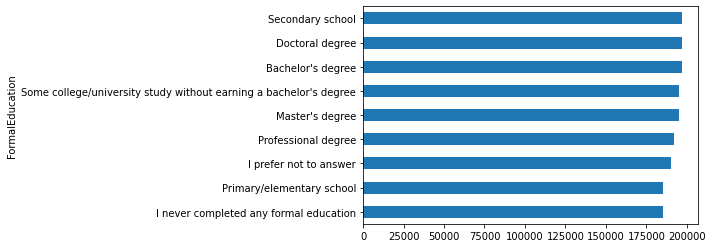

In [13]:
#ploting FD
FD.plot(kind='barh')

Result
the highest salary belong to 3 kind of Formal Education Bachelor's degree, Doctoral degree and Secondary school

**Q4)What the programing language that the people most like it ?**

In [14]:
#lang that we have in data are
lang=data['HaveWorkedLanguage'].unique()
lang

array(['Swift', 'JavaScript; Python; Ruby; SQL', 'Java; PHP; Python', ...,
       'C++; C#; JavaScript; Lua; PHP',
       'C++; C#; Perl; Ruby; SQL; VB.NET; VBA',
       'C#; JavaScript; PHP; Python; R; SQL'], dtype=object)

<AxesSubplot:>

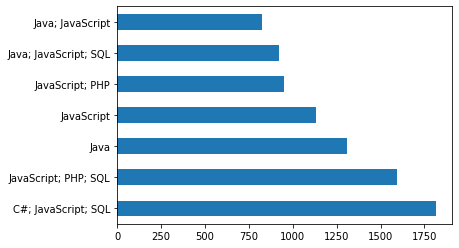

In [15]:
like_lang=data['HaveWorkedLanguage'].value_counts()
like_lang=like_lang.head(7)
like_lang.plot(kind='barh')

Result 
The most liked programing languages are C#, JavaScript and SQL

In [17]:
#selecting the integare cols and most relevent catogricals cols 
X= data[['University','EmploymentStatus','FormalEducation','MajorUndergrad','CompanySize','CompanyType',
       'HoursPerWeek',
      'Professional'
   ]]

y= data[['Salary']]
#converting catogricals cols into int by 
cat_colm = X.select_dtypes(include=['object'])
X=pd.get_dummies(X,cat_colm.columns)

In [18]:
training, testing, L_train, L_test = train_test_split(X, y, test_size = .20)

In [19]:
model=LinearRegression(normalize=True) 

In [20]:
model.fit(training, L_train) 

LinearRegression(normalize=True)

In [21]:
y_p=model.predict(testing)
np.size(y_p)

10279

In [22]:
L_test

,Salary
45029,22583.166855
40056,42.000000
30710,31250.000000
12448,38687.782805
43575,66000.000000
...,...
47009,82000.000000
13500,104000.000000
17919,35237.116429
13223,45248.868778


In [23]:
np.mean((model.predict(testing))-L_test)

Salary   -124.730627
dtype: float64

In [24]:
model.score(testing,L_test)

0.027297468624943977

In [25]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(L_test, y_p))

39144.04877324327

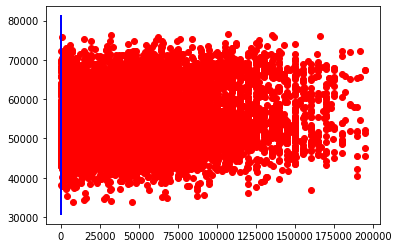

In [29]:
plt.scatter(L_test,y_p, color='red')
plt.plot(training, model.predict(training), color='blue')
plt.show()